## Import

In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
from itertools import chain

# for reading and displaying images
# from skimage.io import imread
import matplotlib.pyplot as plt
from glob import glob

# for creating validation set
from sklearn.model_selection import train_test_split

# PyTorch libraries and modules
import torch
import torch.nn as nn
import torch.nn.functional as F

# models
from src.architectures.resnet import *
from src.architectures.levakov_96 import *
from src.architectures.inception import *
from src.architectures.dinsdale import *

from src.run import *

from torch.optim import *
import torch.optim as optim
from torchsummary import summary
from tensorboardX import SummaryWriter

## Dataloader
for kFold, it will be run again on the run

In [2]:
from src.dataloader import *

train_dset = MyDataset(task_type='age')
test_dset = MyDataset(task_type='age', test=True)

train_loader = DataLoader(train_dset, batch_size=8)
test_loader = DataLoader(test_dset, batch_size=8)

## Load Model

In [3]:
    def load_model(model, verbose=True):
    
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    print(f'Model {model.capitalize()} is selected.')

    if model == 'resnet':
        

        opt = Option()
        model = generate_model(model_depth=opt.model_depth,
                                    n_classes=opt.n_classes,
                                    n_input_channels=opt.n_input_channels,
                                    shortcut_type=opt.shortcut_type,
                                    conv1_t_size=opt.conv1_t_size,
                                    conv1_t_stride=opt.conv1_t_stride,
                                    no_max_pool=opt.no_max_pool,
                                    widen_factor=opt.resnet_widen_factor)

    elif model == 'levakov':
        model = Levakov(task_type='age')

    elif model == 'inception':
        model = Inception3()

    elif model == 'dinsdale':
        model = Dinsdale(1, 1, 2)

    else: return None

    model.to(device)
    if verbose:
        print(summary(model, input_size=(1, 96, 96, 96)))
    
    return model, device

model = 'dinsdale'
# model, device = load_model('dinsdale')

## Setups

Default Settings

In [4]:
task_type = 'age' # no longer used.
resize = True
scheduler = False
epochs = range(100)
folds = range(10)

Loss & Optimizer

In [6]:
from src.losses import RMSELoss

loss_fn = nn.MSELoss()
lamb = 0.0005
# optimizer = optim.Adam(model.parameters(), lr=1e-4)

Metrics

In [7]:
rmse_fn = RMSELoss()
mae_fn = nn.L1Loss()

## Run

### kFold Run

Model Dinsdale is selected.
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv3d-1       [-1, 16, 96, 96, 96]             448
       BatchNorm3d-2       [-1, 16, 96, 96, 96]              32
       BasicConv3d-3       [-1, 16, 96, 96, 96]               0
            Conv3d-4       [-1, 16, 96, 96, 96]           6,928
       BatchNorm3d-5       [-1, 16, 96, 96, 96]              32
         MaxPool3d-6       [-1, 16, 48, 48, 48]               0
       BasicConv3d-7       [-1, 16, 48, 48, 48]               0
            Conv3d-8       [-1, 32, 48, 48, 48]          13,856
       BatchNorm3d-9       [-1, 32, 48, 48, 48]              64
      BasicConv3d-10       [-1, 32, 48, 48, 48]               0
           Conv3d-11       [-1, 32, 48, 48, 48]          27,680
      BatchNorm3d-12       [-1, 32, 48, 48, 48]              64
        MaxPool3d-13       [-1, 32, 24, 24, 24]               0
      Basic

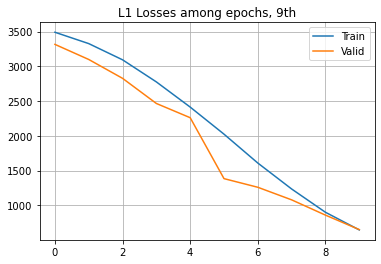

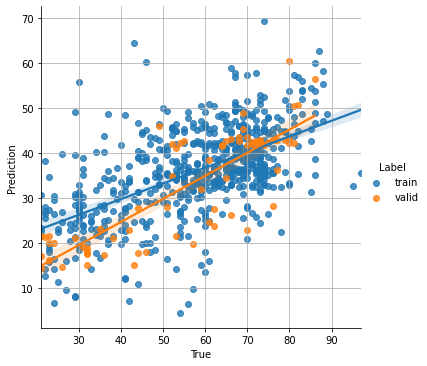

FOLD 0 - EPOCHS 10
MSE  :: [TRAIN] 455.122 | [VALID] 913.505
MAE  :: [TRAIN] 18.377   | [VALID] 26.385
RMSE :: [TRAIN] 20.813  | [VALID] 29.773
CORR :: [TRAIN] 0.602 | [VALID] 0.666
FOLD 0 - EPOCHS 15
MSE  :: [TRAIN] 143.978 | [VALID] 177.366
MAE  :: [TRAIN] 9.555   | [VALID] 10.617
RMSE :: [TRAIN] 11.358  | [VALID] 13.000
CORR :: [TRAIN] 0.713 | [VALID] 0.779


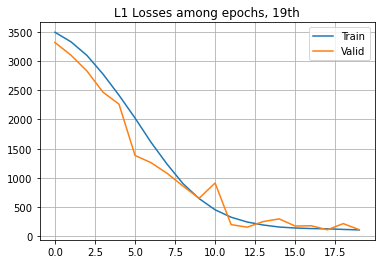

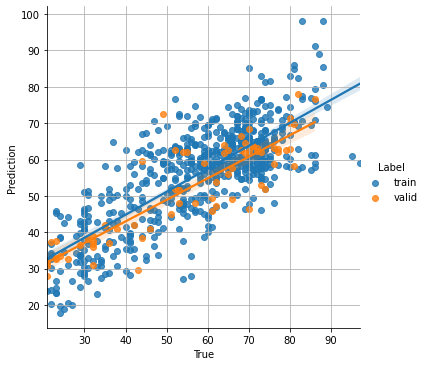

FOLD 0 - EPOCHS 20
MSE  :: [TRAIN] 111.281 | [VALID] 243.700
MAE  :: [TRAIN] 8.379   | [VALID] 12.803
RMSE :: [TRAIN] 10.115  | [VALID] 15.334
CORR :: [TRAIN] 0.770 | [VALID] 0.843
FOLD 0 - EPOCHS 25
MSE  :: [TRAIN] 95.571 | [VALID] 352.288
MAE  :: [TRAIN] 7.769   | [VALID] 15.496
RMSE :: [TRAIN] 9.332  | [VALID] 18.394
CORR :: [TRAIN] 0.803 | [VALID] 0.700


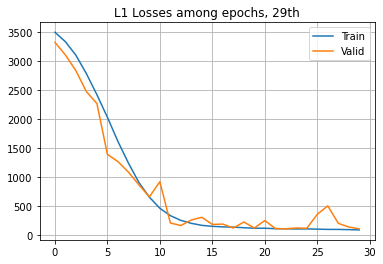

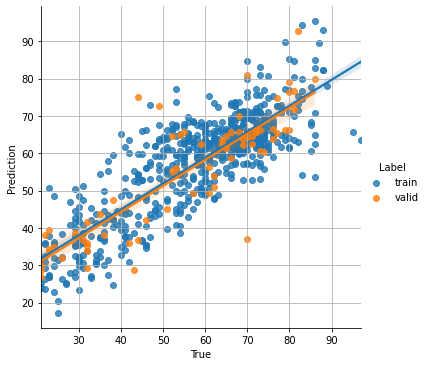

FOLD 0 - EPOCHS 30
MSE  :: [TRAIN] 80.015 | [VALID] 134.662
MAE  :: [TRAIN] 7.049   | [VALID] 9.158
RMSE :: [TRAIN] 8.504  | [VALID] 11.159
CORR :: [TRAIN] 0.837 | [VALID] 0.820
FOLD 0 - EPOCHS 35
MSE  :: [TRAIN] 66.905 | [VALID] 176.401
MAE  :: [TRAIN] 6.322   | [VALID] 10.224
RMSE :: [TRAIN] 7.736  | [VALID] 12.983
CORR :: [TRAIN] 0.865 | [VALID] 0.813


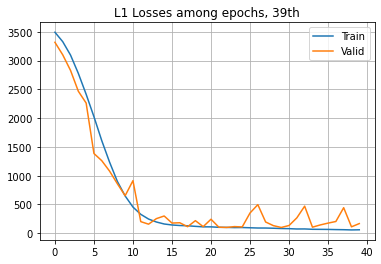

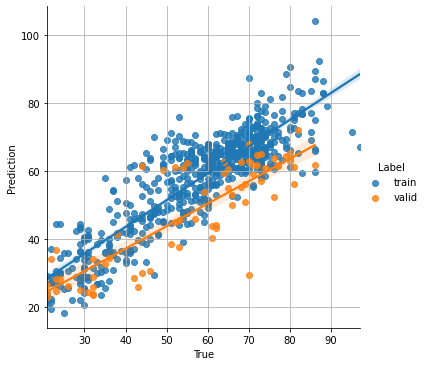

FOLD 0 - EPOCHS 40
MSE  :: [TRAIN] 58.684 | [VALID] 111.704
MAE  :: [TRAIN] 5.947   | [VALID] 8.178
RMSE :: [TRAIN] 7.272  | [VALID] 10.229
CORR :: [TRAIN] 0.883 | [VALID] 0.841
FOLD 0 - EPOCHS 45
MSE  :: [TRAIN] 50.537 | [VALID] 194.286
MAE  :: [TRAIN] 5.512   | [VALID] 11.682
RMSE :: [TRAIN] 6.721  | [VALID] 13.817
CORR :: [TRAIN] 0.900 | [VALID] 0.868


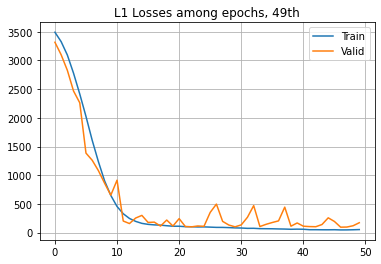

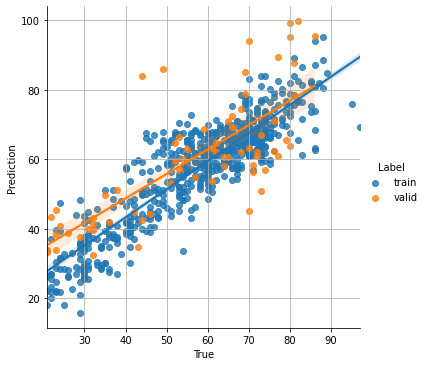

FOLD 0 - EPOCHS 50
MSE  :: [TRAIN] 48.164 | [VALID] 363.028
MAE  :: [TRAIN] 5.452   | [VALID] 16.337
RMSE :: [TRAIN] 6.619  | [VALID] 18.745
CORR :: [TRAIN] 0.905 | [VALID] 0.665
FOLD 0 - EPOCHS 55
MSE  :: [TRAIN] 34.954 | [VALID] 124.762
MAE  :: [TRAIN] 4.568   | [VALID] 8.664
RMSE :: [TRAIN] 5.593  | [VALID] 10.847
CORR :: [TRAIN] 0.932 | [VALID] 0.824


In [ ]:
best_loss = 10

trn_fold_losses, tst_fold_losses = [], []
trn_fold_corrs, tst_fold_corrs = [], []

trn_fold = {
    'MSE': list(),
    'MAE': list(),
    'RMSE': list(),
    'Correlation': list()
}

val_fold = {
    'MSE': list(),
    'MAE': list(),
    'RMSE': list(),
    'Correlation': list()
}

tst_losses, tst_maes, tst_rmses = [], [], []
for fold in folds:
    
    model = 'dinsdale'
    model, device = load_model('dinsdale')
    optimizer = optim.Adam(model.parameters(), lr=1e-4)
    
    train_dset = MyDataset(task_type='age', fold=fold)
    valid_dset = MyDataset(task_type='age', test=True, fold=fold)

    train_loader = DataLoader(train_dset, batch_size=8)
    valid_loader = DataLoader(valid_dset, batch_size=8)
    
    trn_losses, val_losses = [], []
    trn_maes, val_maes = [], []
    trn_rmses, val_rmses = [], []
    
    for e in epochs:

        model, (trn_losses, trn_maes, trn_rmses), trn_preds = train(model, train_loader, resize, device,
                                                              loss_fn, mae_fn, rmse_fn,
                                                              trn_losses, trn_maes, trn_rmses,
                                                              optimizer, scheduler, lamb)
        
        model, (val_losses, val_maes, val_rmses), val_preds =  eval(model, valid_loader, resize, device,
                                                              loss_fn, mae_fn, rmse_fn,
                                                              val_losses, val_maes, val_rmses)


        # SUM UP RESLUTS
        trn_df = make_df(trn_preds, 'train')
        val_df = make_df(val_preds, 'valid')
        reg_df = pd.concat([trn_df, val_df], ignore_index=True)

        trn_corr = reg_df[reg_df['Label'] == 'train'].corr().Prediction['True']
        val_corr = reg_df[reg_df['Label'] == 'valid'].corr().Prediction['True']

        if e % 5 == 0:
            print(f'FOLD {fold} - EPOCHS {e}')
            print(f'MSE  :: [TRAIN] {trn_losses[-1]:.3f} | [VALID] {val_losses[-1]:.3f}')
            print(f'MAE  :: [TRAIN] {trn_maes[-1]:.3f}   | [VALID] {val_maes[-1]:.3f}')
            print(f'RMSE :: [TRAIN] {trn_rmses[-1]:.3f}  | [VALID] {val_rmses[-1]:.3f}')
            print(f'CORR :: [TRAIN] {trn_corr:.3f} | [VALID] {val_corr:.3f}')

        if e % 10 == 9:
            plt.title(f"L1 Losses among epochs, {e}th")
            plt.plot(trn_losses, label='Train')
            plt.plot(val_losses, label='Valid')
            plt.grid(); plt.legend()
            
            sns.lmplot(data=reg_df, x='True', y='Prediction', hue='Label')
            plt.grid()
            plt.show()
    
    trn_fold['MSE'].append(trn_losses)
    trn_fold['MAE'].append(trn_maes)
    trn_fold['RMSE'].append(trn_rmses)
    trn_fold['Correlation'].append(trn_corr)
    
    val_fold['MSE'].append(val_losses)
    val_fold['MAE'].append(val_maes)
    val_fold['RMSE'].append(val_rmses)
    val_fold['Correlation'].append(val_corr)
    
    # TEST
    test_dset = MyDataset(task_type='age', test=True)
    test_loader = DataLoader(test_dset, batch_size=8)
    
    model, (tst_losses, tst_maes, tst_rmses), tst_preds = eval(model, test_loader, resize, device,
                                                              loss_fn, mae_fn, rmse_fn,
                                                              tst_losses, tst_maes, tst_rmses)

    tst_df = make_df(tst_preds, 'test')
    reg_df = pd.concat([reg_df, tst_df], ignore_index=True)

    tst_corr = reg_df[reg_df['Label'] == 'test'].corr().Prediction['True']
    
    print(f'FOLD {fold}', end='')
    print(f'MSE  :: [TEST] {tst_losses[-1]:.3f}')
    print(f'MAE  :: [TEST] {tst_maes[-1]:.3f}')
    print(f'RMSE :: [TEST] {tst_rmses[-1]:.3f}')
    print(f'CORR :: [TEST] {tst_corr:.3f}')

    sns_plot = sns.lmplot(data=reg_df, x='True', y='Prediction', hue='Label')
    sns_plot.savefig(f'{fold}.png')
    plt.grid()
    plt.show()
    
    del model
    torch.cuda.empty_cache()

In [12]:
best_loss = 10

trn_fold_losses, tst_fold_losses = [], []
trn_fold_corrs, tst_fold_corrs = [], []

trn_fold = {
    'MSE': list(),
    'MAE': list(),
    'RMSE': list(),
    'Correlation': list()
}

tst_fold = {
    'MSE': list(),
    'MAE': list(),
    'RMSE': list(),
    'Correlation': list()
}

for fold in folds:
    
    train_dset = MyDataset(task_type='age', fold=fold)
    test_dset = MyDataset(task_type='age', test=True, fold=fold)

    train_loader = DataLoader(train_dset, batch_size=8)
    test_loader = DataLoader(test_dset, batch_size=8)
    
    trn_losses, tst_losses = [], []
    trn_maes, tst_maes = [], []
    trn_rmses, tst_rmses = [], []
    for e in epochs:

        # TRAIN
        trn_bth_loss, trn_bth_mae, trn_bth_rmse = 0, 0, 0
        trn_trues, trn_preds = [], []
        model.train()
        for i, (x, y) in enumerate(train_loader):

            if resize:
                x, y = F.interpolate(x, size=(96, 96, 96)).to(device), y.to(device)

            else:
                x, y = x.to(device), y.to(device)

            optimizer.zero_grad()

            y_pred = model.forward(x).to(device)

            trn_trues.append(y.to('cpu'))
            trn_preds.append(y_pred.to('cpu'))

            # Loss
            loss = loss_fn(y_pred.squeeze(1), y)
            
            # Metrics
            mae = mae_fn(y_pred.squeeze(1), y)
            rmse = rmse_fn(y_pred.squeeze(1), y)
            
            del x, y, y_pred

            loss.backward()
            optimizer.step()
            if scheduler: scheduler.step()

            trn_bth_loss += loss.item()
            trn_bth_mae  += loss.item()
            trn_bth_rmse += loss.item()

        torch.cuda.empty_cache()

        ### loss
        trn_losses.append(trn_bth_loss / len(train_loader))
        trn_maes.append(trn_bth_mae / len(train_loader))
        trn_rmses.append(trn_bth_rmse / len(train_loader))

        ### collect trues/predictions
        trn_trues = list(chain(*trn_trues))
        trn_preds = list(chain(*trn_preds))

        
        # VALID
        tst_bth_loss, tst_bth_mae, tst_bth_rmse = 0, 0, 0
        model.eval()
        tst_trues, tst_preds = [], []
        with torch.no_grad(): # to not give loads on GPU... :(
            for i, (x, y) in enumerate(test_loader):
                if resize:
                    x, y = F.interpolate(x, size=(96, 96, 96)).to(device), y.to(device)

                else:
                    x, y = x.to(device), y.to(device)

                y_pred = model.forward(x).to(device)

                tst_trues.append(y.to('cpu'))
                tst_preds.append(y_pred.to('cpu'))

                # Loss
                loss = loss_fn(y_pred.squeeze(1), y)
                
                # Metrics
                mae = mae_fn(y_pred.squeeze(1), y)
                rmse = rmse_fn(y_pred.squeeze(1), y)
                
                del x, y, y_pred

                tst_bth_loss += loss.item()
                tst_bth_mae  += loss.item()
                tst_bth_rmse += loss.item()
                
        torch.cuda.empty_cache()
        
        ### loss
        tst_losses.append(tst_bth_loss / len(test_loader))
        tst_maes.append(tst_bth_mae / len(test_loader))
        tst_rmses.append(tst_bth_rmse / len(test_loader))

        ### collect trues/predictions
        tst_trues = list(chain(*tst_trues))
        tst_preds = list(chain(*tst_preds))

        
        # SUM UP RESLUTS
        reg_df = pd.DataFrame({
            'True': list(map(float, trn_trues + tst_trues)),
            'Prediction': list(map(float, trn_preds + tst_preds)),
            'Label': ['train'] * len(trn_trues) + ['valid'] * len(tst_trues)
        })

        trn_corr = reg_df[reg_df['Label'] == 'train'].corr().Prediction['True']
        tst_corr = reg_df[reg_df['Label'] == 'valid'].corr().Prediction['True']

        if e % 5 == 0:
            print(f'FOLD {fold} - EPOCHS {e}')
            print(f'MSE  :: [TRAIN] {trn_losses[-1]:.3f} | [VALID] {tst_losses[-1]:.3f}')
            print(f'MAE  :: [TRAIN] {trn_maes[-1]:.3f}   | [VALID] {tst_maes[-1]:.3f}')
            print(f'RMSE :: [TRAIN] {trn_rmses[-1]:.3f}  | [VALID] {tst_rmses[-1]:.3f}')
            print(f'CORR :: [TRAIN] {trn_corr:.3f} | [VALID] {tst_corr:.3f}')

        if e % 10 == 9:
            plt.title(f"L1 Losses among epochs, {e}th")
            plt.plot(trn_losses, label='Train')
            plt.plot(tst_losses, label='Valid')
            plt.grid(); plt.legend()
            
            sns.lmplot(data=reg_df, x='True', y='Prediction', hue='Label')
            plt.grid()
            plt.show()
    
    trn_fold['MSE'].append(trn_losses)
    trn_fold['MAE'].append(trn_maes)
    trn_fold['RMSE'].append(trn_rmses)
    trn_fold['Correlation'].append(trn_corr)
    
    tst_fold['MSE'].append(tst_losses)
    tst_fold['MAE'].append(tst_maes)
    tst_fold['RMSE'].append(tst_rmses)
    tst_fold['Correlation'].append(tst_corr)
    
    # TEST
    test_dset = MyDataset(task_type='age', test=True)
    test_loader = DataLoader(test_dset, batch_size=8)
    
    tst_bth_loss = 0
    model.eval()
    tst_trues, tst_preds = [], []
    with torch.no_grad(): # to not give loads on GPU... :(
        for i, (x, y) in enumerate(test_loader):
            if resize:
                x, y = F.interpolate(x, size=(96, 96, 96)).to(device), y.to(device)

            else:
                x, y = x.to(device), y.to(device)

            y_pred = model.forward(x).to(device)

            tst_trues.append(y.to('cpu'))
            tst_preds.append(y_pred.to('cpu'))

            loss = loss_fn(y_pred.squeeze(1), y)
            
            mae = mae_fn(y_pred.squeeze(1), y)
            rmse = rmse_fn(y_pred.squeeze(1), y)
            del x, y, y_pred

            tst_bth_loss += loss.item()

    torch.cuda.empty_cache()
    ### loss
    tst_loss = tst_bth_loss / len(test_loader)

    ### collect trues/predictions
    tst_trues = list(chain(*tst_trues))
    tst_preds = list(chain(*tst_preds))
    
    tst_df = pd.DataFrame({
        'True': list(map(float, tst_trues)),
        'Prediction': list(map(float, tst_preds)),
        'Label': ['test'] * len(tst_trues)
    })
    reg_df = pd.concat([reg_df, tst_df], ignore_index=True)

    tst_corr = reg_df[reg_df['Label'] == 'test'].corr().Prediction['True']
    print(f'FOLD {fold}', end='')
    print(f'RMSE :: [TEST] {tst_loss:.3f}')
    print(f'CORR :: [TEST] {tst_corr:.3f}')

    sns.lmplot(data=reg_df, x='True', y='Prediction', hue='Label')
    plt.grid()
    plt.show()

KeyboardInterrupt: 